<a href="https://colab.research.google.com/github/AbyssGazer-Oliver/Machine-Learning/blob/main/lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
!pip install --upgrade scikit-optimize==0.5.1
!pip install scikit-learn==0.22.2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [89]:
from sklearn.datasets import load_wine
from sklearn.model_selection import KFold
data = load_wine()

# TODO 1: print the features names in data.feature_names and data.target_names
print(data.feature_names)
print(data.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [90]:
# TODO 2:
X = data.data
y = data.target
print("The number of samples:",X.shape[0])
print("The number of features:",X.shape[1])
print("The number of classes:",len(np.unique(y)))

The number of samples: 178
The number of features: 13
The number of classes: 3


In [91]:
from sklearn.preprocessing import StandardScaler

# TODO 3:
scaling = StandardScaler()
scaling.fit(X)
Xs = scaling.transform(X)

In [92]:
from sklearn.decomposition import PCA

# TODO 4:
ncomp = 2
pca = PCA(n_components=ncomp,svd_solver='randomized',whiten=True)
pca.fit(Xs)
Z = pca.transform(Xs)


# Construct the PCA object

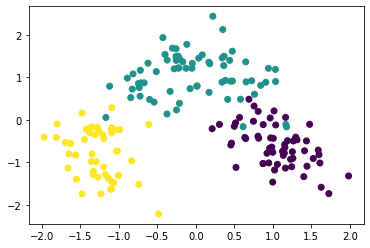

In [93]:
# TODO 5:
plt.scatter(Z[:,0],Z[:,1],c=y)

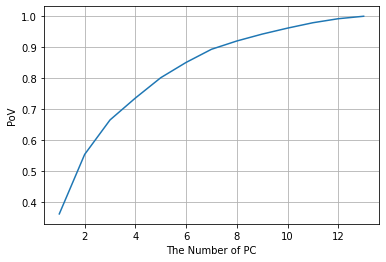

In [94]:
# TODO 6:
nfeatures=X.shape[1]
pca=PCA(n_components=nfeatures,svd_solver='randomized',whiten=True)
pca.fit(Xs)
s=pca.singular_values_**2
pov=np.cumsum(s)/np.sum(s)
pc_num=np.arange(1,nfeatures+1)
plt.plot(pc_num,pov)
plt.xlabel('The Number of PC')
plt.ylabel('PoV')
plt.grid()

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
nfold = 5

# Create a K-fold object
kf = KFold(n_splits=nfold)
kf.get_n_splits(X)

# Number of PCs to try
ncomp_test = np.arange(2,12)
num_nc = len(ncomp_test)

# Accuracy:  acc[icomp,ifold]  is test accuracy when using `ncomp = ncomp_test[icomp]` in fold `ifold`.
acc = np.zeros((num_nc,nfold))


# ==============
# TODO 7:(combined all)

# Loop over number of components to test
for icomp, ncomp in enumerate(ncomp_test):
    
    # Look over the folds
    for ifold, I in enumerate(kf.split(X)):
        Itr, Its = I

        # TODO:  Split data into training 
        Xtr=X[Itr]
        Xts=X[Its]
        ytr=y[Itr]
        yts=y[Its] 

        # TODO:  Create a scaling object and fit the scaling on the training data
        scaling = StandardScaler()
        scaling.fit(Xtr)
        Xs = scaling.transform(Xtr)
        # TODO:  Fit the PCA on the scaled training data
        pca = PCA(n_components=ncomp,svd_solver='randomized',whiten=True)
        pca.fit(Xs)
        Z = pca.transform(Xs)
        # TODO:  Train a classifier on the transformed training data
        # Use a logistic regression classifier
        #   logreg = LogisticRegression(multi_class='auto', solver='lbfgs')
        logreg = LogisticRegression(multi_class='auto', solver='lbfgs')
        logreg.fit(Z,ytr)
        # TODO:  Transform the test data through data scaler and PCA
        Xts_=scaling.transform(Xts)
        Zts=pca.transform(Xts_)
        # TODO:  Predict the labels the test data
        yhat=logreg.predict(Zts)
        # TODO:  Measure the accuracy 
        acc[icomp, ifold] = np.mean(yhat==yts)

The Optimal order with the normal rule is 11
The test accuracy is 0.9553968253968254
The Optimal order with the normal rule is 7
The test accuracy is 0.9495238095238095


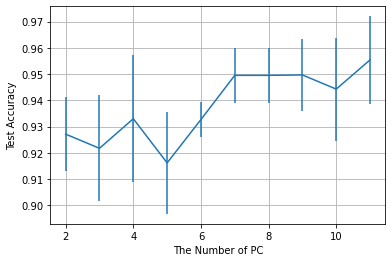

In [96]:
# TODO 8: (Combined all)
acc_mean = np.mean(acc,axis=1)
acc_se = np.std(acc,axis=1)/np.sqrt(nfold-1)
plt.errorbar(ncomp_test,acc_mean,yerr=acc_se)
plt.xlabel('The Number of PC')
plt.ylabel('Test Accuracy')
plt.grid()
# TODO:  Optimal order with the normal rule
Im=np.argmax(acc_mean)
print("The Optimal order with the normal rule is %d" %(ncomp_test[Im]))
print("The test accuracy is",acc_mean[Im])

# TODO:  Optimal order with one SE rule
acc_tgt=acc_mean[Im]-acc_se[Im]
I=np.where(acc_mean>=acc_tgt)[0]
ise=I[0]
print("The Optimal order with the normal rule is %d" %(ncomp_test[ise]))
print("The test accuracy is",acc_mean[ise])

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# TODO 9:
scaler = StandardScaler()
pca = PCA()
svc = SVC(kernel='rbf')
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('svc', svc)])

In [98]:
# TODO 10:
ncomp_test = np.arange(3,11)
c_test =  np.logspace(-2,3,6)
gam_test = np.logspace(-3,1,5)

In [99]:
# TODO 11:
params = {'pca__n_components': ncomp_test,'svc__C' : c_test,'svc__gamma': gam_test}

In [101]:
# TODO 12:
estimator = GridSearchCV(pipe,cv=5,return_train_score=True,param_grid=params)
estimator.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'svc__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'svc__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
             return_train_score=True)

In [103]:
# TODO 13:
print("The best test accuracy is",estimator.best_score_)
print('The best parameter is: %s' %str(estimator.best_params_))

The best test accuracy is 0.9777777777777779
The best parameter is: {'pca__n_components': 5, 'svc__C': 1.0, 'svc__gamma': 0.1}


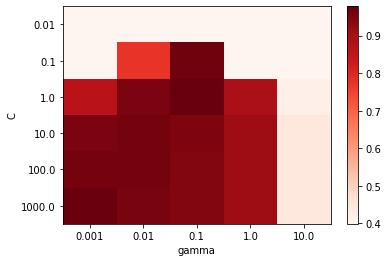

In [105]:
# TODO 14:
test_score=estimator.cv_results_['mean_test_score']
pc_num=len(ncomp_test)
c_num= len(c_test)
gam_num = len(gam_test)
test_score = test_score.reshape((pc_num, c_num, gam_num))
i=np.where(ncomp_test==5)[0][0]
plt.imshow(test_score[i,:,:],aspect='auto',cmap='Reds')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
ax=plt.gca()
ax.set_yticks(np.arange(0,c_num))
ax.set_yticklabels(c_test)
ax.set_xticks(np.arange(0,gam_num))
_=ax.set_xticklabels(gam_test)
